<a href="https://colab.research.google.com/github/promaprogga/Artificial-Intelligence/blob/main/HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Dataset/house-prices-advanced-regression-techniques'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/drive/MyDrive/Dataset/house-prices-advanced-regression-techniques/data_description.txt
/content/drive/MyDrive/Dataset/house-prices-advanced-regression-techniques/sample_submission.csv
/content/drive/MyDrive/Dataset/house-prices-advanced-regression-techniques/test.csv
/content/drive/MyDrive/Dataset/house-prices-advanced-regression-techniques/train.csv


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [20]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/house-prices-advanced-regression-techniques/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [21]:
df.shape

(1460, 81)

### **Feature Selection**

In [22]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [23]:
df.drop(columns=['Id', 'Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], inplace=True)

In [24]:
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

LotFrontage     259
MasVnrType        8
MasVnrArea        8
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64

In [25]:
df.shape

(1460, 75)

In [26]:
df.fillna(method ='ffill', inplace=True)
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [ ]:
#to collect the data which is object
object_data = df.select_dtypes(include=['object'])
#to convert data of object type to numbers
la = preprocessing.LabelEncoder()
for i in range(object_data.shape[1]):
    object_data.iloc[:, i] = la.fit_transform(object_data.iloc[:, i])

#concat between data none object and data object after convert it
num_data = df.select_dtypes(exclude=['object'])
data = pd.concat([object_data, num_data], axis=1)

In [28]:
data.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,0,61,0,0,0,0,0,2,2008,208500
1,3,1,3,3,0,2,0,24,1,2,...,298,0,0,0,0,0,0,5,2007,181500
2,3,1,0,3,0,4,0,5,2,2,...,0,42,0,0,0,0,0,9,2008,223500
3,3,1,0,3,0,0,0,6,2,2,...,0,35,272,0,0,0,0,2,2006,140000
4,3,1,0,3,0,2,0,15,2,2,...,192,84,0,0,0,0,0,12,2008,250000


### Plotting

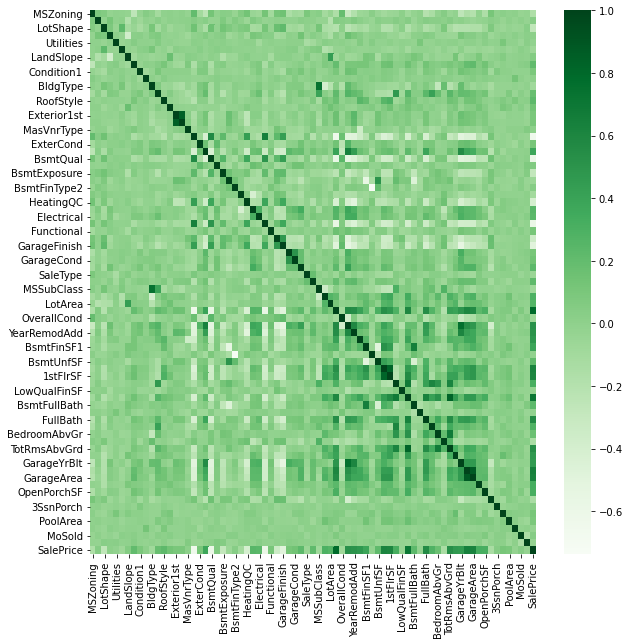

In [55]:
plt.figure(figsize=(10,10))
cor = data.corr()
sns.heatmap(cor,  cmap=plt.cm.Greens)
plt.show()

**Features**

In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, interaction_only=True)
output_nparray = poly.fit_transform(data)
target_feature_names = ['x'.join(['{}^{}'.format(pair[0],pair[1]) for pair in tuple if pair[1]!=0]) for tuple in [zip(df.columns, p) for p in poly.powers_]]
output_df = pd.DataFrame(output_nparray, columns=target_feature_names)

In [39]:
x = output_df.iloc[:, :-1]
y = output_df.iloc[:, -1]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=44, shuffle =True)

## **Model and Testing** 

---

1.   Linear Regression Model
2.   Random Forest Model
3.   XGBoost Model
4.   Decision Tree Model


## **Linear Regression** Model

In [42]:
LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)
print('Linear Regression Train Score is : ' , LinearRegressionModel.score(X_train, y_train))
print('Linear Regression Test Score is : ' , LinearRegressionModel.score(X_test, y_test))
print('Linear Regression Coef is : ' , LinearRegressionModel.coef_)
print('Linear Regression intercept is : ' , LinearRegressionModel.intercept_)

Linear Regression Train Score is :  1.0
Linear Regression Test Score is :  0.9999071229483107
Linear Regression Coef is :  [-7.62704512e-04  9.02670602e-01 -3.95155695e-01 ... -5.45168977e-03
 -1.30509313e+02 -1.07784800e-01]
Linear Regression intercept is :  -118100407.77960569


In [44]:
y_pred_linear = LinearRegressionModel.predict(X_test)
print('Y predict: ',y_pred_linear[:5])
print('Y test: ', y_test[:5])

Y predict:  [2.78995662e+08 3.02629056e+08 6.93517485e+08 2.69606834e+08
 2.81026999e+08]
Y test:  1140    279112000.0
132     302555250.0
642     693105000.0
952     269005100.0
1297    280840000.0
Name: SaleCondition^1xSalePrice^1, dtype: float64


In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

## **Random Forest** Model

In [49]:
forest_model = RandomForestRegressor(n_estimators=100, max_depth=10)
forest_model.fit(X_train, y_train )
predicted_random_forest = forest_model.predict(X_test)
print("Mean Absolute Error using Random Forest:", mean_absolute_error(y_test, predicted_random_forest))

Mean Absolute Error using Random Forest: 1161396.5728438166


## **XGBoost** Model

In [50]:
xg_model = XGBRegressor(n_estimators=100)
xg_model.fit(X_train, y_train)
predicted_XGBoost = xg_model.predict(X_test)
print("Mean Absolute Error using XGBoost: ", mean_absolute_error(y_test, predicted_XGBoost))

[16:45:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Absolute Error using XGBoost:  1348952.4520547944


## **Decision Tree** Model

In [51]:
decision_model = DecisionTreeRegressor()  
decision_model.fit(X_train, y_train) 
predicted_decision_trees = decision_model.predict(X_test)
print ("Mean Absolute Error using Decision Tress :", mean_absolute_error(y_test, predicted_decision_trees))

Mean Absolute Error using Decision Tress : 2297747.4109589043
